# 🐍 Bangladeshi Snake Recognizer  

| No. | English Name            | বাংলা নাম          | Type            |
|-----|-------------------------|-------------------|-----------------|
| 1   | Spectacled Cobra        | গোখরা             | Venomous        |
| 2   | Monocled Cobra          | চশমা গোখরা        | Venomous        |
| 3   | King Cobra              | রাজ গোখরা         | Venomous        |
| 4   | Common Krait            | কালাই সাপ         | Venomous        |
| 5   | Banded Krait            | ব্যান্ডেড ক্রাইট  | Venomous        |
| 6   | Russell's Viper         | চন্দ্রবোড়া        | Venomous        |
| 7   | Saw-scaled Viper        | একিস ভাইপার      | Venomous        |
| 8   | Green Pit Viper         | সবুজ পিট ভাইপার   | Venomous        |
| 9   | Beaked Sea Snake        | সমুদ্র সাপ        | Venomous        |
| 10  | Yellow-lipped Sea Krait | সমুদ্র ক্রাইট     | Venomous        |
| 11  | Indian Rock Python      | আজগর              | Non-Venomous    |
| 12  | Rat Snake               | দাড়াশ             | Non-Venomous    |
| 13  | Checkered Keelback      | ধামন              | Non-Venomous    |
| 14  | Common Wolf Snake       | নেকড়ে সাপ         | Non-Venomous    |
| 15  | Green Trinket Snake     | সবুজ সাপ          | Non-Venomous    |
| 16  | Bronzeback Tree Snake   | গাছে ওঠা সাপ     | Non-Venomous    |
| 17  | Common Kukri Snake      | কুক্রি সাপ        | Non-Venomous    |




#Training 3rd model "resnet50"  model



In [ ]:
%matplotlib inline

In [ ]:
!pip install -Uqq fastai

In [ ]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Bangladeshi_snake_recognizer

/content/drive/My Drive/Bangladeshi_snake_recognizer


In [ ]:
# path to your 'data' folder
path = Path('/content/drive/My Drive/Bangladeshi_snake_recognizer')

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),  # make all images uniform size
    batch_tfms=aug_transforms(
        size=224,
        flip_vert=True,       # allow vertical flips
        max_rotate=30,        # random rotation up to ±30 degrees
        max_zoom=1.2,         # zoom up to 20%
        max_lighting=0.3,     # stronger brightness/contrast changes
        max_warp=0.2,         # perspective warping
        p_affine=0.9,         # probability of affine transform
        p_lighting=0.9        # probability of lighting transform
    )
)

dls = dblock.dataloaders(path, bs=32)


In [ ]:
print(dls.vocab)

['Banded_Krait', 'Beaked_Sea_Snake', 'Bronzeback_Tree_Snake', 'Checkered_Keelback', 'Common_Krait', 'Common_Kukri_Snake', 'Common_Wolf_Snake', 'Green_Pit_Viper', 'Green_Trinket_Snake', 'Indian_Rock_Python', 'King_Cobra', 'Monocled_Cobra', 'Rat_Snake', "Russell's_Viper", 'Saw-scaled_Viper', 'Spectacled_Cobra', 'Yellow-lipped_Sea_Krait']


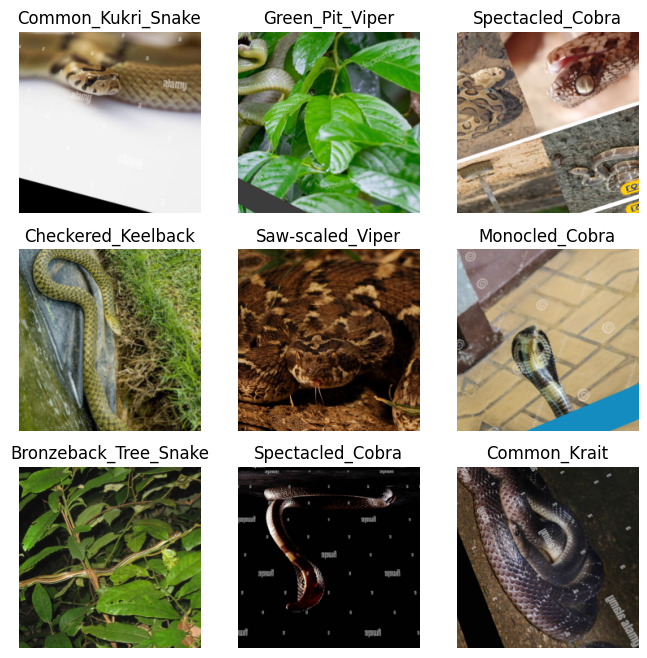

In [ ]:
dls.show_batch(max_n=9, figsize=(8,8))

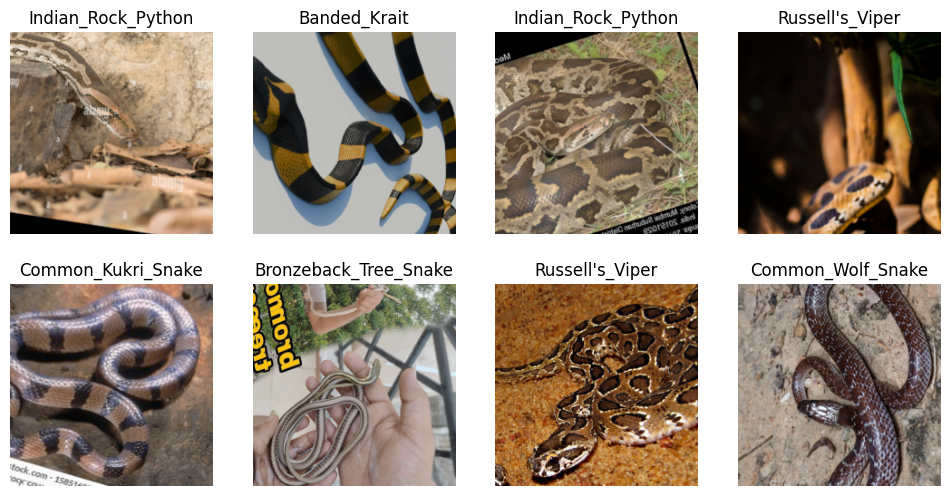

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

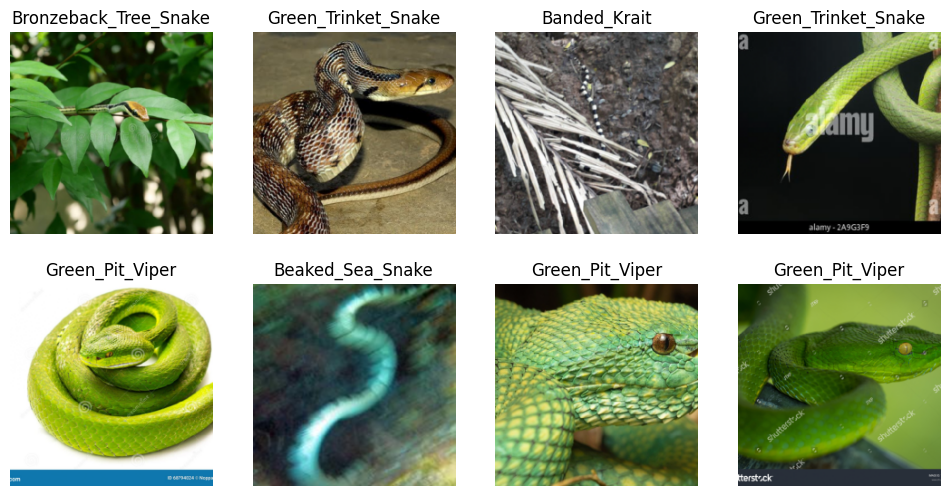

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "snake_dataloader_v3.pkl")

##Fetech the data

In [ ]:
dls = torch.load(f"snake_dataloader_v3.pkl", weights_only=False)


"""
a recent change in PyTorch 2.6:

By default, torch.load now uses weights_only=True.

But your .pkl file (snake_dataloader_vX.pkl) contains a Fastai DataLoaders object, not just weights.
"""

'\na recent change in PyTorch 2.6:\n\nBy default, torch.load now uses weights_only=True.\n\nBut your .pkl file (snake_dataloader_vX.pkl) contains a Fastai DataLoaders object, not just weights.\n'

In [ ]:
model_path = "models"

In [ ]:
model = vision_learner(dls, resnet50, metrics=[error_rate,accuracy])

SuggestedLRs(valley=0.001737800776027143)

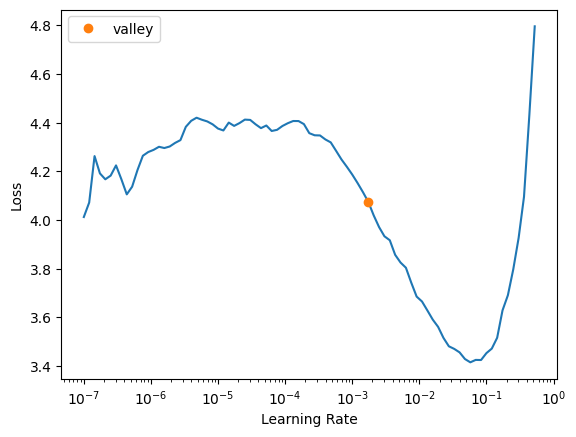

In [ ]:
# 4️⃣ Find learning rate
model.lr_find()

In [ ]:
!python --version

Python 3.12.11


In [ ]:
# 5️⃣ Train model
model.fine_tune(10, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.105850,1.158586,0.369620,0.630380,05:21


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.223826,0.774025,0.255696,0.744304,01:58
1,1.013034,0.713881,0.237975,0.762025,02:00
2,0.876436,0.657735,0.212658,0.787342,01:58
3,0.686799,0.623402,0.182278,0.817722,02:02
4,0.545244,0.573706,0.162025,0.837975,02:02
5,0.454580,0.597001,0.172152,0.827848,02:00
6,0.346325,0.492714,0.118987,0.881013,02:02
7,0.268454,0.478050,0.131646,0.868354,02:00
8,0.242027,0.472299,0.121519,0.878481,02:04
9,0.208873,0.485801,0.134177,0.865823,02:01


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78aec81bee80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78aec81bee80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

In [ ]:
model.save("bangladeshi-snake-recognizer-v3")

Path('models/bangladeshi-snake-recognizer-v3.pth')

In [ ]:
model.export("bangladeshi-snake-recognizer-v3.pkl")